In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.options.mode.chained_assignment = None

pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)

In [3]:
df= pd.read_csv("/Users/arushiagarwal/Downloads/home/marketing_sample_for_trulia_com-real_estate__20190901_20191031__30k_data.csv")
df.sample(5)

,Uniq Id,Crawl Timestamp,Url,Title,Description,Price,Image Url,Style,Sqr Ft,Longitude,Latitude,Home Id,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Features,Last Sold Year,Last Sold For,Last Tax Assestment,Last Tax Year,Address,City,State,Zipcode,Property Type,Address Full,Facts,Days On Trulia,Listing Agent Name,Listing Agent Contact No,Agent Name 1,Agent Contact No 1,Agent Name 2,Agent Contact No 2,Agent Name 3,Agent Contact No 3,Agent Name 4,Agent Contact No 4,Agent Name 5,Agent Contact No 5,Brokername,Image 1,Image 2,Image 3,Image 4,Image 5,Image 6,Image 7,Image 8,Image 9,Image 10,Image 11,Image 12,Image 13,Image 14,Image 15,Image 16,Image 17,Image 18,Image 19,Image 20,Image 21,Image 22,Image 23,Image 24,Image 25
13138,19d7235d7b90afa19e9a28c70defd3b9,2019-09-19 16:09:32 +0000,https://www.trulia.com/p/ky/lyndon/1419-twin-r...,"1419 Twin Ridge Rd Lyndon, KY 40242",PRICE REDUCED & QUICK POSSESSION on this OPEN...,"$300,000",https://static.trulia-cdn.com/pictures/thumbs_...,3 Beds / 3 Baths,"2,127 sqft",-85.592255,38.268517,3.246593e+09,"9,148 sqft",3.0,3.0,1999.0,$141/sqft,"Single Family Home | $141/sqft | Lot Size: 9,1...",2017.0,"$268,000","$268,000",2018.0,"1419 Twin Ridge Rd Lyndon, KY 40242",Lyndon,KY,40242.0,NaN,"1419 Twin Ridge Rd, Lyndon, KY 40242","3 Beds | 2.5 Baths | 2,127 sqft | Single Famil...",44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...
21095,c9a62a18a11cc94d268b5b5210aa2f57,2019-09-28 02:22:37 +0000,https://www.trulia.com/p/wa/seattle/3919-laton...,"3919 Latona Ave NE #103 Seattle, WA 98105",Welcome to this spacious 1 bd/1 ba +den condo...,"$459,000",https://static.trulia-cdn.com/pictures/thumbs_...,1 Bed / 1 Bath,869 sqft,-122.326070,47.655285,3.020779e+09,0.32 acres,1.0,1.0,1999.0,$528/sqft,Condo | $528/sqft | Lot Size: 0.32 acres | Bui...,2016.0,"$359,000","$398,000",2018.0,"3919 Latona Ave NE #103 Seattle, WA 98105",Seattle,WA,98105.0,NaN,"3919 Latona Ave NE #103, Seattle, WA 98105",1 Bed | 1 Bath | 869 sqft | Condo | 0.32 acres...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_...,https://static.trulia-cdn.com/pictures/thumbs_.

In [4]:
df.shape

(30006, 68)

## Dividing 'Features' Column into Separate Columns

In [5]:
#Create Column for each feature, 1 means it has the feature, 0 means it does not 
desired_features = ['Garage', 'Fireplace', 'HOA', 'Air Conditioning', 'Basement', 'Patio', 'Porch', 'Washer', 'Dryer' ]

for f in desired_features:
    df[f] = df['Features'].str.contains(f).astype(int)

    print("The Number of Properties without a " + f + ": ", df[df[f]==0][f].count())
    print("The Number of properties with a " + f + ": ", df[df[f]==1][f].count())

The Number of Properties without a Garage:  11613
The Number of properties with a Garage:  18393
The Number of Properties without a Fireplace:  17631
The Number of properties with a Fireplace:  12375
The Number of Properties without a HOA:  18678
The Number of properties with a HOA:  11328
The Number of Properties without a Air Conditioning:  10129
The Number of properties with a Air Conditioning:  19877
The Number of Properties without a Basement:  23033
The Number of properties with a Basement:  6973
The Number of Properties without a Patio:  18693
The Number of properties with a Patio:  11313
The Number of Properties without a Porch:  23069
The Number of properties with a Porch:  6937
The Number of Properties without a Washer:  22255
The Number of properties with a Washer:  7751
The Number of Properties without a Dryer:  22340
The Number of properties with a Dryer:  7666


In [6]:
#Combine Washer and Dryer to show if property contains none (0), one (1) or both (2)
df['Laundry']=df['Washer']+df['Dryer']

In [7]:
#Get property type
df['Property Type'] = df['Features'].str.split(pat ='|').apply(lambda x: x[0])
df['Property Type'] = df['Property Type'].str.rstrip()

In [8]:
#Check property types
df.groupby('Property Type').count()

,Uniq Id,Crawl Timestamp,Url,Title,Description,Price,Image Url,Style,Sqr Ft,Longitude,Latitude,Home Id,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Features,Last Sold Year,Last Sold For,Last Tax Assestment,Last Tax Year,Address,City,State,Zipcode,Address Full,Facts,Days On Trulia,Listing Agent Name,Listing Agent Contact No,Agent Name 1,Agent Contact No 1,Agent Name 2,Agent Contact No 2,Agent Name 3,Agent Contact No 3,Agent Name 4,Agent Contact No 4,Agent Name 5,Agent Contact No 5,Brokername,Image 1,Image 2,Image 3,Image 4,Image 5,Image 6,Image 7,Image 8,Image 9,Image 10,Image 11,Image 12,Image 13,Image 14,Image 15,Image 16,Image 17,Image 18,Image 19,Image 20,Image 21,Image 22,Image 23,Image 24,Image 25,Garage,Fireplace,HOA,Air Conditioning,Basement,Patio,Porch,Washer,Dryer,Laundry
Property Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
$245/monthly HOA,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1
$70/monthly HOA,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1
1 Bed,2,2,2,2,2,2,0,2,2,2,2,0,0,2,2,2,1,2,1,1,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2
Air Conditioning,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Apartment,68,68,68,68,68,68,59,67,68,68,68,68,59,64,65,65,63,68,43,43,54,53,68,68,68,68,68,55,59,0,0,0,0,0,0,0,0,0,0,0,0,0,59,57,55,55,55,53,51,50,47,47,46,45,44,43,41,39,39,39,37,35,32,28,28,26,24,68,68,68,68,68,68,68,68,68,68
Apartment Condo Townhouse,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1
Condo,4227,4227,4227,4227,4224,4227,4085,4222,4104,4227,4227,4227,1928,4116,4218,4066,4083,4227,2238,2238,2667,2652,4227,4227,4227,4227,4227,2959,3548,0,0,0,0,0,0,0,0,0,0,0,0,0,4085,3993,3965,3920,3883,3819,3763,3708,3631,3552,3434,3302,3174,3060,2916,2771,2625,2474,2332,2200,2049,1904,1763,1642,1495,4227,4227,4227,4227,4227,4227,4227,4227,4227,4227
Coop,281,281,281,281,281,281,211,281,247,281,281,281,208,251,278,277,195,281,18,18,206,202,281,281,281,281,281,206,225,0,0,0,0,0,0,0,0,0,0,0,0,0,211,205,200,196,192,185,177,164,140,122,103,81,63,52,45,35,29,24,18,17,14,11,10,10,10,281,281,281,281,281,281,281,281,281,281
Farm Ranch,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [9]:
df['Property Type']=df['Property Type'].astype('string')

In [10]:
#Rename misc property types to more general categories
condo = ['$245/monthly HOA', '$70/monthly HOA', 'Apartment Condo Townhouse', '1 Bed', 'Apartment Condo Townhouse']
unknown = ['Air Conditioning', 'Garage' ]
SFH = ["Rooms: Dining Room ", 'Farm Ranch', 'Rooms: Dining Room']
lot = ['Lot Size: 0.42 acres', 'Lot Size: 1.15 acres', 'Lot Size: 3354 sqft','Lot Size: 4800 sqft']

In [11]:
for a in range(len(df)):
    b = df.loc[a]['Property Type']
    if str(b) in condo:
        df.loc[a, 'Property Type'] = 'Condo'
    elif str(b) in unknown:
        df.loc[a, 'Property Type'] = 'Unknown' 
    elif str(b) in SFH:
        df.loc[a, 'Property Type'] = 'Single Family Home'  
    elif str(b) in lot:
        df.loc[a, 'Property Type'] = 'Lot Land' 

In [12]:
#Pull number of stories of building from features column
df['Features']=df['Features'].astype('string')
df['Stories']= ''
for a in range(len(df)):
    string = df.loc[a]['Features']
    m = re.search(r'Stories: (\d+)', string, re.IGNORECASE )
    try: 
        df.loc[a, 'Stories'] = m.group(1)
    except:
        if df.loc[a]['Property Type'] == 'Lot Land':
            df.loc[a, 'Stories'] = 0
        else:
            df.loc[a, 'Stories'] = 1

In [13]:
df['House Age'] = 2019 - df['Year Built']

In [14]:
df.shape

(30006, 80)

## Removing Duplicate rows

In [15]:
df = df.drop_duplicates(subset = "Home Id", keep='last')

In [16]:
df.shape

(29914, 80)

## Heatmap (Visualization) of Null values

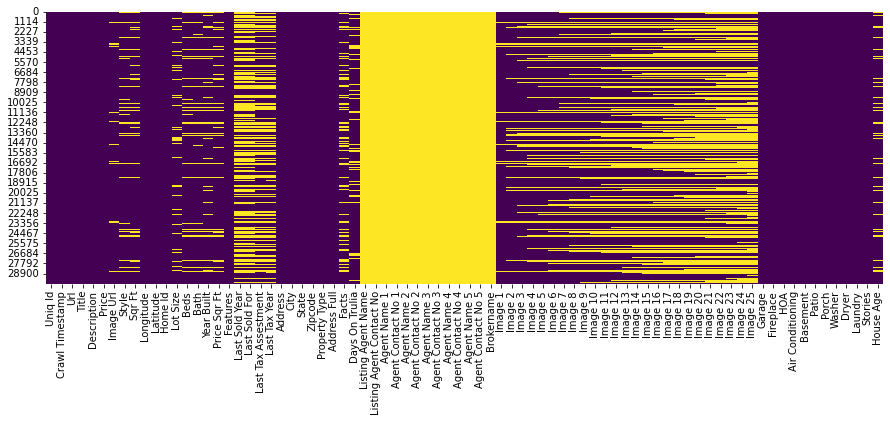

In [17]:
plt.subplots(figsize= (15,5))
sns.heatmap(df.isnull(), cbar= False, cmap= "viridis")
plt.show()

# Handling Missing Values

In [18]:
df.isnull().sum().sort_values()

Uniq Id                         0
Garage                          0
Fireplace                       0
HOA                             0
Air Conditioning                0
Address Full                    0
Property Type                   0
State                           0
City                            0
Address                         0
Basement                        0
Patio                           0
Porch                           0
Washer                          0
Dryer                           0
Features                        0
Stories                         0
Crawl Timestamp                 0
Url                             0
Laundry                         0
Latitude                        0
Longitude                       0
Title                           0
Price                           0
Home Id                         1
Zipcode                         3
Description                    22
Image Url                    1422
Image 1                      1422
Sqr Ft        

In [19]:
for this_col in df.columns:
    prct = np.mean(df[this_col].isnull())
    print('{} - {}%'.format(this_col, round(prct*100)))

Uniq Id - 0%
Crawl Timestamp - 0%
Url - 0%
Title - 0%
Description - 0%
Price - 0%
Image Url - 5%
Style - 8%
Sqr Ft - 7%
Longitude - 0%
Latitude - 0%
Home Id - 0%
Lot Size - 15%
Beds - 9%
Bath - 8%
Year Built - 12%
Price Sqr Ft - 9%
Features - 0%
Last Sold Year - 53%
Last Sold For - 53%
Last Tax Assestment - 39%
Last Tax Year - 39%
Address - 0%
City - 0%
State - 0%
Zipcode - 0%
Property Type - 0%
Address Full - 0%
Facts - 23%
Days On Trulia - 17%
Listing Agent Name - 100%
Listing Agent Contact No - 100%
Agent Name 1 - 100%
Agent Contact No 1 - 100%
Agent Name 2 - 100%
Agent Contact No 2 - 100%
Agent Name 3 - 100%
Agent Contact No 3 - 100%
Agent Name 4 - 100%
Agent Contact No 4 - 100%
Agent Name 5 - 100%
Agent Contact No 5 - 100%
Brokername - 100%
Image 1 - 5%
Image 2 - 10%
Image 3 - 13%
Image 4 - 15%
Image 5 - 17%
Image 6 - 19%
Image 7 - 21%
Image 8 - 23%
Image 9 - 25%
Image 10 - 26%
Image 11 - 28%
Image 12 - 30%
Image 13 - 32%
Image 14 - 34%
Image 15 - 36%
Image 16 - 38%
Image 17 - 40%

In [20]:
def drop_cols(df):
    for col in df.columns:
        prct = np.mean(df[col].isnull())
        if prct > 0.55:
            df.drop(col, inplace= True, axis= 1)

In [21]:
drop_cols(df)

In [22]:
df.shape

(29914, 65)

In [23]:
df.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Url', 'Title', 'Description', 'Price',
       'Image Url', 'Style', 'Sqr Ft', 'Longitude', 'Latitude', 'Home Id',
       'Lot Size', 'Beds', 'Bath', 'Year Built', 'Price Sqr Ft', 'Features',
       'Last Sold Year', 'Last Sold For', 'Last Tax Assestment',
       'Last Tax Year', 'Address', 'City', 'State', 'Zipcode', 'Property Type',
       'Address Full', 'Facts', 'Days On Trulia', 'Image 1', 'Image 2',
       'Image 3', 'Image 4', 'Image 5', 'Image 6', 'Image 7', 'Image 8',
       'Image 9', 'Image 10', 'Image 11', 'Image 12', 'Image 13', 'Image 14',
       'Image 15', 'Image 16', 'Image 17', 'Image 18', 'Image 19', 'Image 20',
       'Image 21', 'Image 22', 'Image 23', 'Garage', 'Fireplace', 'HOA',
       'Air Conditioning', 'Basement', 'Patio', 'Porch', 'Washer', 'Dryer',
       'Laundry', 'Stories', 'House Age'],
      dtype='object')

In [24]:
col = ['Crawl Timestamp', 'Url', 'Title', 'Description', 'Image Url', 'Style', 'Longitude', 'Latitude', 'Home Id', 
       'Address Full', 'Price Sqr Ft',
       'Facts', 'Days On Trulia', 'Image 1', 'Image 2', 'Image 3', 'Image 4',
       'Image 5', 'Image 6', 'Image 7', 'Image 8', 'Image 9', 'Image 10',
       'Image 11', 'Image 12', 'Image 13', 'Image 14', 'Image 15', 'Image 16',
       'Image 17', 'Image 18', 'Image 19', 'Image 20', 'Image 21', 'Image 22',
       'Image 23']

In [25]:
df = df.drop(col, axis=1)

In [26]:
df.shape

(29914, 29)

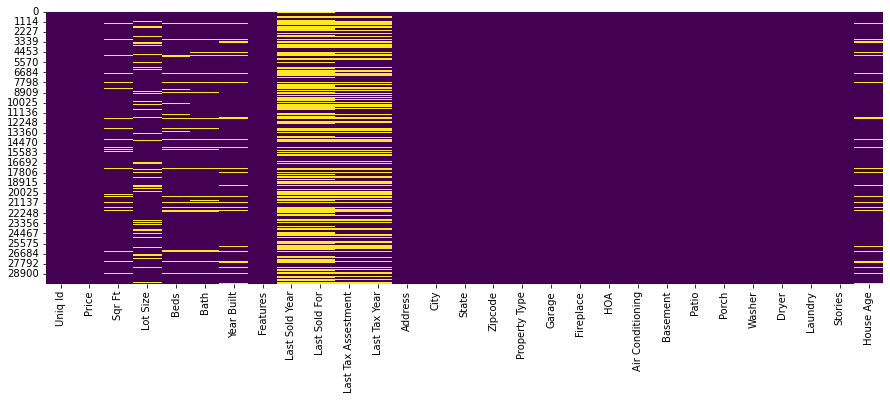

In [27]:
plt.subplots(figsize= (15,5))
sns.heatmap(df.isnull(), cbar= False, cmap= "viridis")
plt.show()

In [28]:
df.isnull().sum().sort_values()

Uniq Id                    0
Laundry                    0
Dryer                      0
Washer                     0
Porch                      0
Patio                      0
Basement                   0
Air Conditioning           0
HOA                        0
Fireplace                  0
Garage                     0
Property Type              0
Stories                    0
State                      0
Address                    0
Features                   0
Price                      0
City                       0
Zipcode                    3
Sqr Ft                  2215
Bath                    2504
Beds                    2579
Year Built              3735
House Age               3735
Lot Size                4501
Last Tax Assestment    11734
Last Tax Year          11811
Last Sold For          15749
Last Sold Year         15749
dtype: int64

In [29]:
df.sample(5)

,Uniq Id,Price,Sqr Ft,Lot Size,Beds,Bath,Year Built,Features,Last Sold Year,Last Sold For,Last Tax Assestment,Last Tax Year,Address,City,State,Zipcode,Property Type,Garage,Fireplace,HOA,Air Conditioning,Basement,Patio,Porch,Washer,Dryer,Laundry,Stories,House Age
25534,47acc75d32dee7b2d4656b1c2553db45,"$679,000","1,053 sqft","1,053 sqft",2.0,2.0,1905.0,"Condo | $645/sqft | Lot Size: 1,053 sqft | $19...",2015.0,"$510,000","$575,700",2019.0,"172 H St #1 South Boston, MA 02127",South Boston,MA,2127.0,Condo,0,1,1,1,1,1,0,1,1,2,2,114.0
26062,e24598b286b74ae81e2093f33da0a814,"$869,000","1,494 sqft","6,874 sqft",3.0,2.0,1929.0,"Single Family Home | $582/sqft | Lot Size: 6,8...",NaN,NaN,"$106,705",2018.0,"4526 W 63rd St Los Angeles, CA 90043",Los Angeles,CA,90043.0,Single Family Home,0,0,0,0,0,0,0,0,0,0,1,90.0
10050,5ec665941cc60b6cd02393d4fc250e30,"$15,000","1,170 sqft","4,375 sqft",4.0,1.0,1970.0,"Single Family Home | $13/sqft | Lot Size: 4,37...",2016.0,"$14,450","$8,450",2018.0,"2250 Eldridge Ave Memphis, TN 38108",Memphis,TN,38108.0,Single Family Home,0,1,0,0,0,0,0,0,0,0,1,49.0
27994,13ee2fd66afcbb97bab532b6a301f659,"$749,000","1,794 sqft",NaN,NaN,NaN,1895.0,Multi Family | $418/sqft | Built in 1895 | 94 ...,NaN,NaN,NaN,NaN,"809 Dauphine St #11 New Orleans, LA 70116",New Orleans,LA,70116.0,Multi Family,0,0,0,1,0,0,0,0,0,0,1,124.0
22057,74a6c47fee80e18fb3ecd5d0b243d4a2,"$1,395,000","1,294 sqft",NaN,1.0,2.0,2008.0,"Condo | $1,078/sqft | $1,650/monthly HOA | Bui...",NaN,NaN,NaN,NaN,"4 Battery Wharf #4405 Boston, MA 02109",Boston,MA,2109.0,Condo,0,0,1,1,0,0,0,0,0,0,1,11.0


### Filling Missing Values

In [30]:
df['Lot Size'] = df['Lot Size'].fillna(0)

In [31]:
for element in (df.index):
    value= df['Sqr Ft'][element]
    if pd.isnull(value):
        if df['Property Type'][element] == 'Lot Land':
            df['Sqr Ft'][element] = 0
        else:
            lot = df['Lot Size'][element]
            s = str(lot).split(" ")
            if lot == 0 or 'acre' in s[1]:
                df['Sqr Ft'][element] = 1500
            else:
                df['Sqr Ft'][element] = lot

In [32]:
for element in (df.index):
    value= df['Beds'][element]
    if pd.isnull(value):
        if df['Property Type'][element] == 'Lot Land':
            df['Beds'][element] = 0
        else:
            df['Beds'][element] = 1

In [33]:
for element in (df.index):
    value= df['Bath'][element]
    if pd.isnull(value):
        if df['Property Type'][element] == 'Lot Land':
            df['Bath'][element] = 0
        else:
            df['Bath'][element] = 1

In [34]:
df['Year Built'] = df['Year Built'].fillna(-1)

In [35]:
df['House Age'] = df['House Age'].fillna(-1)

In [36]:
for ind, value in df['Lot Size'].iteritems():
    if value != '0':
        value = str(value).replace(',', '')
        s = str(value).split(" ")
        if len(s)> 1:
            if 'acre' in s[1]:
                s[0] = float(s[0]) * 43560
            df['Lot Size'][ind] = s[0]

In [37]:
df['Sqr Ft'] = df['Sqr Ft'].replace({',':''}, regex = True)
df['Sqr Ft'] = df['Sqr Ft'].replace({'sqft':''}, regex = True)

In [38]:
df['Price'] = df['Price'].replace({',':''}, regex = True)
df['Price'] = df['Price'].replace({'\$':''}, regex = True)
df['Price'] = df['Price'].replace({'\+':''}, regex = True)

In [39]:
df[np.isnan(df.Zipcode)]

,Uniq Id,Price,Sqr Ft,Lot Size,Beds,Bath,Year Built,Features,Last Sold Year,Last Sold For,Last Tax Assestment,Last Tax Year,Address,City,State,Zipcode,Property Type,Garage,Fireplace,HOA,Air Conditioning,Basement,Patio,Porch,Washer,Dryer,Laundry,Stories,House Age
782,3f92be1501a68cfd0693442f0c59afbe,35000,0,4329,0.0,0.0,-1.0,Lot Land | Lot Size: 4329 sqft | 122 Days on T...,NaN,NaN,NaN,NaN,"Oak Bnd Tujunga, CA",Tujunga,CA,NaN,Lot Land,0,0,0,0,0,0,0,0,0,0,0,-1.0
7483,f50b329a84a57af40a450d063304deca,249000,6795,6795,1.0,1.0,-1.0,Single Family Home | Lot Size: 6795 sqft | 180...,NaN,NaN,NaN,NaN,"23840 Box Canyon Rd Chatsworth, CA",Chatsworth,CA,NaN,Single Family Home,0,0,0,0,0,0,0,0,0,0,1,-1.0
23182,3adece1ae953b46d636d4ce75b2e18bd,45000,0,5222,0.0,0.0,-1.0,Lot Land | Lot Size: 5222 sqft | 2 Days on Tru...,NaN,NaN,NaN,NaN,"2642 N Paradise Dr El Sereno, CA",El Sereno,CA,NaN,Lot Land,0,0,0,0,0,0,0,0,0,0,0,-1.0


In [40]:
df['Zipcode'] = df['Zipcode'].fillna(90001) # Giving specific value since all missing zipcodes are from CA state

In [41]:
# Dropping the rows where value of target variable 'Price' is not given correctly
for index,value in df.iterrows():
    if df['Price'][index].isnumeric():
        pass
    else:
        df.drop(index, inplace = True)

In [42]:
df.shape

(29686, 29)

In [43]:
df.sample(5)

,Uniq Id,Price,Sqr Ft,Lot Size,Beds,Bath,Year Built,Features,Last Sold Year,Last Sold For,Last Tax Assestment,Last Tax Year,Address,City,State,Zipcode,Property Type,Garage,Fireplace,HOA,Air Conditioning,Basement,Patio,Porch,Washer,Dryer,Laundry,Stories,House Age
14816,aafe755cb971fd9eab43d0af16d51cdd,65000,687,5314,2.0,1.0,1950.0,"Single Family Home | $95/sqft | Lot Size: 5,31...",NaN,NaN,"$33,200",2018.0,"4626 N 44th St Milwaukee, WI 53218",Milwaukee,WI,53218.0,Single Family Home,1,0,0,1,1,0,0,0,0,0,1,69.0
11471,4271888d861601c5650f49b3e47d20ae,100000,0,9417,0.0,0.0,-1.0,Lot Land | Lot Size: 9417 sqft | 156 Days on T...,NaN,NaN,NaN,NaN,"Onyx Dr Los Angeles, CA 90032",Los Angeles,CA,90032.0,Lot Land,0,0,0,0,0,0,0,0,0,0,0,-1.0
8729,6475d9e72a0aac8bbaf629b1b8f669f4,274900,2378,13068.0,4.0,2.0,1955.0,Multi Family | $116/sqft | Lot Size: 0.30 acre...,NaN,NaN,NaN,NaN,"1005 S 119th St #1007 West Allis, WI 53214",West Allis,WI,53214.0,Multi Family,1,0,0,1,0,0,0,0,0,0,2,64.0
5713,65c91e2d64fe1ec7b5146a2a29976ddf,2475000,5852,27878.4,5.0,5.5,2003.0,Single Family Home | $423/sqft | Lot Size: 0.6...,2016.0,"$1,480,000","$156,910",2018.0,"4908 E Calle Del Medio Phoenix, AZ 85018",Phoenix,AZ,85018.0,Single Family Home,1,1,0,1,0,1,0,1,1,2,2,16.0
29611,e71c4d184a9ee15cc2a31bac3b18757c,824900,3497,10454,3.0,4.0,2001.0,"Single Family Home | $236/sqft | Lot Size: 10,...",2001.0,"$501,493","$223,281",2016.0,"9432 Queen Charlotte Dr Las Vegas, NV 89145",Las Vegas,NV,89145.0,Single Family Home,1,1,1,1,1,1,1,1,1,2,1,18.0


In [44]:
PE_Conditions = [
    (df['Price'] < '500000'),
    (df['Price'] >= '500000') & (df['Price'] < '999999'),
    (df['Price'] >= '999999')
]
PE_Categories = ['band1', 'band2', 'band3']
df['Price Category'] = np.select(PE_Conditions, PE_Categories)

In [45]:
df.sample(5)

,Uniq Id,Price,Sqr Ft,Lot Size,Beds,Bath,Year Built,Features,Last Sold Year,Last Sold For,Last Tax Assestment,Last Tax Year,Address,City,State,Zipcode,Property Type,Garage,Fireplace,HOA,Air Conditioning,Basement,Patio,Porch,Washer,Dryer,Laundry,Stories,House Age,Price Category
25648,86d766a0ae9a94d0c1b1983f30033d51,189000,1560,3044,3.0,3.0,1976.0,Townhouse | $121/sqft | Lot Size: 3044 sqft | ...,NaN,NaN,NaN,NaN,"16562 Space Center Blvd Houston, TX 77058",Houston,TX,77058.0,Townhouse,1,1,1,1,0,1,1,0,0,0,2,43.0,band1
13881,ccae5b3b08b6ed413c57e88417888fec,2500000,6560,4098,4.0,4.0,1931.0,Multi Family | $381/sqft | Lot Size: 4098 sqft...,NaN,NaN,NaN,NaN,"246 Avenue U Brooklyn, NY 11223",Brooklyn,NY,11223.0,Multi Family,0,0,0,0,0,0,0,0,0,0,2,88.0,band1
9057,04268cd349505422691f903e07721046,559000,3956,7405,4.0,3.0,1910.0,"Single Family Home | $141/sqft | Lot Size: 7,4...",2016.0,"$489,270","$489,270",2018.0,"2024 Boulevard Napoleon Louisville, KY 40205",Louisville,KY,40205.0,Single Family Home,1,1,0,1,1,1,1,0,0,0,2,109.0,band2
18501,acae07fb40936f9891687d091107a307,360000,2240,9360,4.0,3.0,1972.0,"Single Family Home | $161/sqft | Lot Size: 9,3...",NaN,NaN,"$21,990",2018.0,"4118 W Chenango Ave Littleton, CO 80123",Littleton,CO,80123.0,Single Family Home,1,0,0,1,1,0,0,1,1,2,1,47.0,band1
11638,352b22b802ccdc11990f4726296ee1c1,3250000,3693,4007520.0,3.0,4.0,1978.0,Lot Land | $880/sqft | Lot Size: 92.0 acres | ...,2017.0,"$2,218,600","$2,218,600",2018.0,"6490 Russell Cave Rd Lexington, KY 40511",Lexington,KY,40511.0,Lot Land,1,1,0,1,1,1,0,0,0,0,1,41.0,band1


## Sanity Check

In [46]:
df['Price'] = df['Price'].astype(int)

if (df['Price'].min() > 0):
    print(df['Price'].describe(), "\n")
    print("Sanity check for Price done. No outliers")
else:
    print("Outliers found")

count    2.968600e+04
mean     5.300286e+05
std      1.142630e+06
min      1.000000e+00
25%      1.850000e+05
50%      3.099000e+05
75%      5.349000e+05
max      6.000000e+07
Name: Price, dtype: float64 

Sanity check for Price done. No outliers


In [47]:
df['Sqr Ft'] = df['Sqr Ft'].astype(float)

if (df['Sqr Ft'].min() >= 0):
    print(df['Sqr Ft'].describe(), "\n")
    print("Sanity check for Sqr Ft done. No outliers")
else:
    print("Outliers found")

count    2.968600e+04
mean     4.771956e+03
std      2.403986e+05
min      0.000000e+00
25%      1.200000e+03
50%      1.718000e+03
75%      2.486000e+03
max      3.600380e+07
Name: Sqr Ft, dtype: float64 

Sanity check for Sqr Ft done. No outliers


In [48]:
df['Lot Size'] = df['Lot Size'].astype(float)

if (df['Lot Size'].min() >= 0):
    print(df['Lot Size'].describe(), "\n")
    print("Sanity check for Lot Size done. No outliers")
else:
    print("Outliers found")

count    2.968600e+04
mean     7.994617e+04
std      4.539219e+06
min      0.000000e+00
25%      2.280750e+03
50%      6.416500e+03
75%      1.089000e+04
max      5.502665e+08
Name: Lot Size, dtype: float64 

Sanity check for Lot Size done. No outliers


In [49]:
df['Beds'] = df['Beds'].astype(int)

if (df['Beds'].min() >= 0):
    print(df['Beds'].describe(), "\n")
    print("Sanity check for Beds done. No outliers")
else:
    print("Outliers found")

count    29686.000000
mean         3.028161
std          1.654659
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         65.000000
Name: Beds, dtype: float64 

Sanity check for Beds done. No outliers


In [50]:
df['Bath'] = df['Bath'].astype(float)

if (df['Bath'].min() >= 0):
    print(df['Bath'].describe(), "\n")
    print("Sanity check for Bath done. No outliers")
else:
    print("Outliers found")

count    29686.000000
mean         2.380900
std          1.547536
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         98.000000
Name: Bath, dtype: float64 

Sanity check for Bath done. No outliers


In [51]:
df['Property Type'].value_counts()

Single Family Home     18707
Condo                   4214
Townhouse               2526
Lot Land                2263
Multi Family            1400
Coop                     279
Mobile Manufactured      211
Apartment                 64
Unknown                   22
Name: Property Type, dtype: Int64